# NLP Basic Assignment
## NLP 맛보기 - spam.csv를 가지고 유의미한 해석을 도출해주세요!

In [4]:
# 필요한 모듈 불러오기
import pandas as pd

## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다. 물론 7주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고, 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다 :)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
spam = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tobigs19_week7_nlp_basic/과제/spam.csv')

In [8]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [27]:
spam.shape

(5572, 2)

## Tokenizing


In [36]:
import nltk


In [37]:
# 예시 코드 코드
from nltk.tokenize import word_tokenize

nltk.download('punkt')
word_tokenize(spam.iloc[5]['v2'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['FreeMsg',
 'Hey',
 'there',
 'darling',
 'it',
 "'s",
 'been',
 '3',
 'week',
 "'s",
 'now',
 'and',
 'no',
 'word',
 'back',
 '!',
 'I',
 "'d",
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 '?',
 'Tb',
 'ok',
 '!',
 'XxX',
 'std',
 'chgs',
 'to',
 'send',
 ',',
 'å£1.50',
 'to',
 'rcv']

In [38]:
# word_tokenize와 비슷하나 구두점을 별도로 분리하는 tokenizer
from nltk.tokenize import WordPunctTokenizer

tokenizer = WordPunctTokenizer()
print(tokenizer.tokenize(spam.iloc[5]['v2']))

['FreeMsg', 'Hey', 'there', 'darling', 'it', "'", 's', 'been', '3', 'week', "'", 's', 'now', 'and', 'no', 'word', 'back', '!', 'I', "'", 'd', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', '?', 'Tb', 'ok', '!', 'XxX', 'std', 'chgs', 'to', 'send', ',', 'å', '£', '1', '.', '50', 'to', 'rcv']


In [39]:
#정규표현식으로 분리하는 tokenizer
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
print(tokenizer.tokenize(spam.iloc[5]['v2']))

['FreeMsg', 'Hey', 'there', 'darling', 'it', 's', 'been', '3', 'week', 's', 'now', 'and', 'no', 'word', 'back', 'I', 'd', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'Tb', 'ok', 'XxX', 'std', 'chgs', 'to', 'send', 'å', '1', '50', 'to', 'rcv']


In [40]:
## 특수문자 제거
import re
word = re.sub('[^a-zA-Z]', ' ', spam.iloc[5]['v2'])
words = word_tokenize(word)
print(words)          

['FreeMsg', 'Hey', 'there', 'darling', 'it', 's', 'been', 'week', 's', 'now', 'and', 'no', 'word', 'back', 'I', 'd', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'Tb', 'ok', 'XxX', 'std', 'chgs', 'to', 'send', 'to', 'rcv']


In [41]:
from nltk.corpus import stopwords

nltk.download('stopwords')
english_stops = set(stopwords.words('english'))
words = [word for word in words if word not in english_stops]
print(words)  

['FreeMsg', 'Hey', 'darling', 'week', 'word', 'back', 'I', 'like', 'fun', 'still', 'Tb', 'ok', 'XxX', 'std', 'chgs', 'send', 'rcv']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [44]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(word) for word in words]
print(words) # 표제어추출

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['FreeMsg', 'Hey', 'darling', 'week', 'word', 'back', 'I', 'like', 'fun', 'still', 'Tb', 'ok', 'XxX', 'std', 'chgs', 'send', 'rcv']


In [45]:
words = [word.lower() for word in words]
print(words)# 소문자 변환

['freemsg', 'hey', 'darling', 'week', 'word', 'back', 'i', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'rcv']


In [46]:


spam_token = []
for i in range(len(spam)):
    words = re.sub('[^a-zA-Z]', ' ', spam.iloc[i]['v2'])  # 특수문자 및 숫자 제거
    words = word_tokenize(words)  # tokenize
    words = [word for word in words if word not in english_stops]  # 불용어 제거
    words = [lemmatizer.lemmatize(word) for word in words]  # 표제어추출
    words = [word.lower() for word in words]  # 소문자 변환
    spam_token.append(words)

## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText가 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

In [47]:
from gensim.models import Word2Vec

CBOW = Word2Vec(spam_token, size=2, window=2, min_count=1, workers=1, iter=1000, sg=0)
CBOW_words = CBOW.wv.index2word
CBOW_vectors = CBOW.wv.vectors

In [48]:
CBOW_df = pd.DataFrame(CBOW_vectors, columns = ['x1', 'x2'])
CBOW_df['words'] = CBOW_words
CBOW_df = CBOW_df[['words', 'x1', 'x2']]
CBOW_df

,words,x1,x2
0,i,-1.498837,-0.654757
1,u,-0.679418,-0.610645
2,call,1.685603,-1.250304
3,get,0.365228,-0.770361
4,ur,0.834410,-0.851202
...,...,...,...
7300,heap,-1.423422,-0.720357
7301,lowes,-3.839432,-0.649880
7302,salesman,-0.434599,-0.227335
7303,pity,-5.522639,-0.923443


In [49]:
CBOW.most_similar('week', topn=5)

<ipython-input-49-2b7de8fdd784>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  CBOW.most_similar('week', topn=5)


[('increment', 1.0),
 ('yours', 1.0),
 ('ibuprofen', 1.0),
 ('doggin', 1.0),
 ('website', 1.0)]

In [50]:
CBOW.most_similar('happy', topn=5)

<ipython-input-50-21d117d91a0b>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  CBOW.most_similar('happy', topn=5)


[('keen', 1.0),
 ('think', 1.0),
 ('love', 0.9999998807907104),
 ('destination', 0.9999998807907104),
 ('at', 0.9999996423721313)]

In [51]:
CBOW.most_similar('customer', topn=5)

<ipython-input-51-bd3e387dbf0b>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  CBOW.most_similar('customer', topn=5)


[('wt', 1.0),
 ('horo', 1.0),
 ('custcare', 1.0),
 ('mobilesdirect', 1.0),
 ('getstop', 1.0)]

### CBOW의 유사도는 별로다.

In [52]:
from gensim.models import FastText

Fastext = FastText(spam_token, size=100, window=5, min_count=5, workers=4, sg=1)
Fastext_words = Fastext.wv.index2word
Fastext_vectors = Fastext.wv.vectors

In [53]:
Fastext.most_similar('week', topn=5)

<ipython-input-53-f41dd7c374f5>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  Fastext.most_similar('week', topn=5)


[('no', 0.9830858111381531),
 ('every', 0.9828594326972961),
 ('st', 0.9798993468284607),
 ('ringtone', 0.9774481058120728),
 ('weekly', 0.9744753241539001)]

In [54]:
Fastext.most_similar('happy', topn=5)

<ipython-input-54-e81b167bc042>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  Fastext.most_similar('happy', topn=5)


[('love', 0.9928434491157532),
 ('good', 0.9905682802200317),
 ('have', 0.9902082085609436),
 ('happen', 0.9893115162849426),
 ('hear', 0.9891761541366577)]

###Fasttext가  좀 더 유사한 단어를 잘 표현했다고 확인.

## 본인이 도출해낸 해석을 적어주세요!

- 유사도, Wordcloud, 이진 분류 모델, Plot 뭐든 상관없으니 분명하고 인상적인 해석을 적어주시면 됩니다.

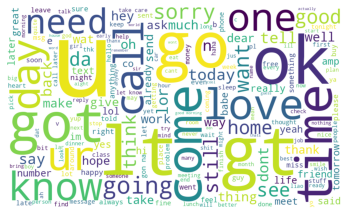

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

ham_index = spam.loc[spam.v1=='ham',].index

ham_oneline = ""
for i in ham_index:
    for j in spam_token[i]:
        ham_oneline = ham_oneline + j + " "

wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate(ham_oneline))
plt.axis("off")
plt.show()

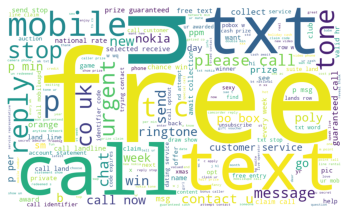

In [57]:
spam_index = spam.loc[spam.v1=='spam',].index

spam_oneline = ""
for i in spam_index:
    for j in spam_token[i]:
        spam_oneline = spam_oneline + j + " "

wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate(spam_oneline))
plt.axis("off")
plt.show()

### 스팸인 데이터와 스팸이 아닌 데이터간의 단어들의 빈도수가 다른것을 확인인